# 2-1. 미니 프로젝트: 택시요금 데이터 다루기
# 데이터 불러오기, 데이터 확인

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/aiffel/data/trip.csv')
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [50]:
# Q. info() 메서드를 사용하여 데이터 컬럼명과 자료형을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [51]:
# Q. describe() 메서드를 사용하여 데이터 컬럼별 통계량을 확인합니다.
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


# 중복데이터 확인

In [52]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [53]:
# Q. 중복 데이터를 확인합니다.
# 위에서 확인한 중복 데이터의 승객명을 [[PASSENGER_NAME]] 대신 넣어주세요.
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [54]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [55]:
# Q. 중복 데이터를 제거합니다.
data .drop_duplicates()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [56]:
# 데이터 확인 
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


# 결측치 확인

In [57]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [58]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [59]:
# Q. 결측치를 제거합니다.
data = data .dropna()

In [60]:
# 데이터 확인 
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

# passenger_count 컬럼의 이상치 제거

In [61]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22698, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

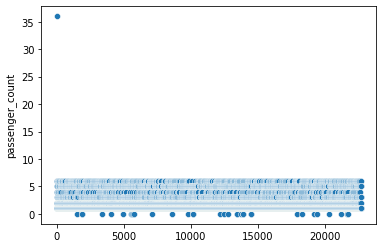

In [62]:
# passenger_count 값의 scatter plot을 그립니다.
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [63]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)
data = data[data['passenger_count'] <= 6]

In [64]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)
len(data[data['passenger_count'] == 0])

33

In [65]:
# passenger_count 컬럼의 이상치를 제거합니다.
data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

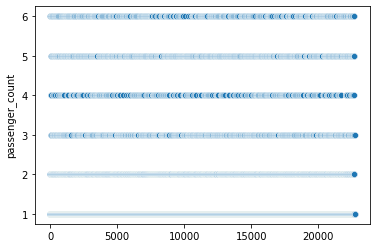

In [66]:
# passenger_count의 scatter plot을 다시 그려봅니다.
sns.scatterplot(x = data.index, y = data['passenger_count'])

# 수치형 컬럼의 이상치 제거

In [67]:
# Q. trip_distance의 이상치를 확인합니다.

In [68]:
data['trip_distance'].describe()

count    22664.000000
mean         2.912993
std          3.652851
min          0.000000
25%          0.990000
50%          1.610000
75%          3.062500
max         33.960000
Name: trip_distance, dtype: float64

<AxesSubplot:ylabel='trip_distance'>

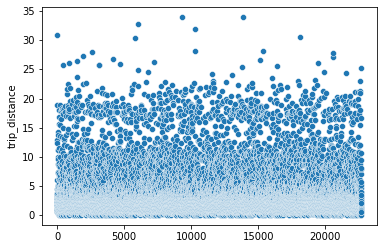

In [69]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

In [70]:
data.sort_values('trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
6910,Amy Allen,03/26/2017 2:07:08 AM,03/26/2017 2:07:12 AM,Credit Card,1,0.00,18.00,2.00,0.00
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.00,0.00,0.00
17790,Matthew Gonzalez,07/08/2017 12:54:02 AM,07/08/2017 12:55:03 AM,Debit Card,2,0.00,2.50,0.00,0.00
2819,Melody Curry,06/21/2017 4:44:54 PM,06/21/2017 4:45:13 PM,Credit Card,2,0.00,75.00,7.70,0.00
10641,Darrell Hoffman,12/20/2017 3:20:42 PM,12/20/2017 3:20:48 PM,Cash,2,0.00,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [71]:
len(data[data['trip_distance']==0])

147

In [72]:
# Q. trip_distance의 이상치를 제거합니다.
data = data[data['trip_distance']!=0]

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

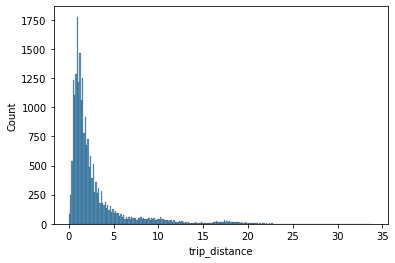

In [73]:
# Q. trip_distance의 히스토그램을 그립니다.
sns.histplot(data['trip_distance'])

In [74]:
# 데이터 확인 
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22517.000000,22517.00000,22517.000000,22517.000000,22517.000000
mean,1.645912,2.93201,12.958392,1.829477,0.309597
std,1.285741,3.65714,12.701348,2.766966,1.387242
min,1.000000,0.01000,-120.000000,0.000000,0.000000
25%,1.000000,1.00000,6.500000,0.000000,0.000000
50%,1.000000,1.63000,9.500000,1.360000,0.000000
75%,2.000000,3.09000,14.500000,2.450000,0.000000
max,6.000000,33.96000,999.990000,200.000000,19.100000


In [75]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)
len(data[data['fare_amount'] <= 0])

16

In [76]:
# Q. fare_amount의 이상치를 제거합니다.
data = data[data['fare_amount'] > 0]

In [77]:
# Q. fare_amount의 이상치를 제거합니다.
data = data[data['fare_amount'] < 300]

<AxesSubplot:ylabel='fare_amount'>

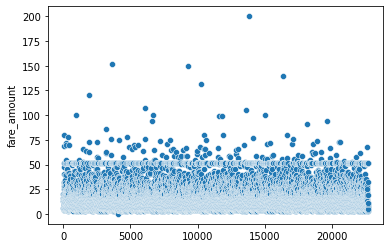

In [78]:
# Q. fare_amount의 scatter plot을 그립니다.
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [79]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x
        
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22500, dtype: float64

In [80]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [81]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
15501,Julie Ferguson,12/29/2017 9:06:34 PM,12/29/2017 9:07:19 PM,Cash,1,4.20,2.50,0.00,0.00
22037,Michael Singleton,12/10/2017 12:20:19 PM,12/10/2017 12:20:56 PM,Cash,1,0.09,2.50,0.00,0.00
6702,Yvonne Brooks,08/26/2017 7:33:22 AM,08/26/2017 7:34:18 AM,Debit Card,1,0.10,2.50,0.00,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.30,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00


<AxesSubplot:ylabel='tip_amount'>

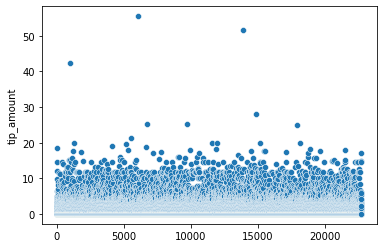

In [82]:
# Q. tip_amount의 scatter plot을 그립니다.
sns.scatterplot(x = data.index, y = data['tip_amount'])

In [83]:
# Q. tip_amount의 이상치를 확인합니다.
len(data[data['tip_amount'] > 35])

3

In [84]:
# Q. tip_amount의 이상치를 제거합니다.
data = data[data['tip_amount'] < 35]

In [85]:
len(data)

22497

<AxesSubplot:ylabel='tolls_amount'>

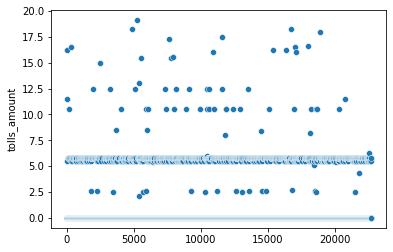

In [86]:
# Q. tolls_amount의 scatter plot을 그립니다.
sns.scatterplot(x = data.index, y = data['tolls_amount'])

# 범주형 데이터 전처리

In [ ]:
# 결제 방법: Debit Card와 Credit Card를 Card로 통합합니다.

In [87]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [ ]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

In [98]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [99]:
data['payment_method'].nunique()

3

In [100]:
data['payment_method'].value_counts()

Cash           11096
Debit Card      5729
Credit Card     5672
Name: payment_method, dtype: int64

In [101]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다. 
# (힌트: replace() 메서드를 사용합니다.)
data['payment_method'] = data['payment_method'].replace({'Debit Card':'Card',  'Credit Card':'Card'})

In [102]:
data['payment_method'].value_counts()

Card    11401
Cash    11096
Name: payment_method, dtype: int64

In [103]:
# 승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다.

# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.
data['passenger_first_name'] = data['passenger_name'].str.split(expand=True)[0]

In [104]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22497 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22497 non-null  object 
 1   tpep_pickup_datetime   22497 non-null  object 
 2   tpep_dropoff_datetime  22497 non-null  object 
 3   payment_method         22497 non-null  object 
 4   passenger_count        22497 non-null  int64  
 5   trip_distance          22497 non-null  float64
 6   fare_amount            22497 non-null  float64
 7   tip_amount             22497 non-null  float64
 8   tolls_amount           22497 non-null  float64
 9   passenger_first_name   22497 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [106]:
# 택시 탑승, 하차 시간을 활용해봅시다.
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [107]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22497 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22497 non-null  object        
 1   tpep_pickup_datetime   22497 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22497 non-null  datetime64[ns]
 3   payment_method         22497 non-null  object        
 4   passenger_count        22497 non-null  int64         
 5   trip_distance          22497 non-null  float64       
 6   fare_amount            22497 non-null  float64       
 7   tip_amount             22497 non-null  float64       
 8   tolls_amount           22497 non-null  float64       
 9   passenger_first_name   22497 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [110]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [111]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22497 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22497 non-null  object         
 1   tpep_pickup_datetime   22497 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22497 non-null  datetime64[ns] 
 3   payment_method         22497 non-null  object         
 4   passenger_count        22497 non-null  int64          
 5   trip_distance          22497 non-null  float64        
 6   fare_amount            22497 non-null  float64        
 7   tip_amount             22497 non-null  float64        
 8   tolls_amount           22497 non-null  float64        
 9   passenger_first_name   22497 non-null  object         
 10  travel_time            22497 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [133]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.
data['travel_time'] = data['travel_time'].dt.seconds

AttributeError: Can only use .dt accessor with datetimelike values

# 보너스 (feature engineering 맛보기)

In [ ]:
data.head()

In [135]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount'] 

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

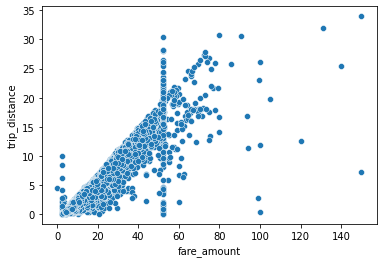

In [134]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.
sns.scatterplot( x = data['fare_amount'], y = data['trip_distance'])

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

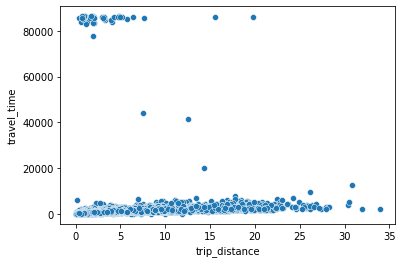

In [136]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.
sns.scatterplot( x = data['trip_distance'], y = data['travel_time'])

In [140]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.
data = data[data['travel_time'] > 60000]